# Interoperability with `scirpy`

It is now possible to convert the file formats between `dandelion>=0.1.1` and `scirpy>=0.6.2` [[Sturm2020]](https://academic.oup.com/bioinformatics/article/36/18/4817/5866543) to enhance the collaboration between the analysis toolkits.

We will download the *airr_rearrangement.tsv* file from here:
```bash
# bash
wget https://cf.10xgenomics.com/samples/cell-vdj/4.0.0/sc5p_v2_hs_PBMC_10k/sc5p_v2_hs_PBMC_10k_b_airr_rearrangement.tsv
```

Gene expression data can also be obtained here

```bash
# bash 
wget https://cf.10xgenomics.com/samples/cell-vdj/4.0.0/sc5p_v2_hs_PBMC_10k/sc5p_v2_hs_PBMC_10k_filtered_feature_bc_matrix.h5
```


<b>Import dandelion module</b>

In [1]:
import os
import dandelion as ddl

# change directory to somewhere more workable
# os.chdir(os.path.expanduser("~/Downloads/dandelion_tutorial/"))
ddl.logging.print_versions()

dandelion==0.3.4.dev68 pandas==2.1.0 numpy==1.24.4 matplotlib==3.7.2 networkx==3.1 scipy==1.11.2


In [2]:
import scirpy as ir
import scanpy as sc



ir.__version__

c:\Users\Amos Choo\Desktop\dandelion\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


'0.14.0'

## `dandelion`

In [7]:
# read in the airr_rearrangement.tsv file
file_location = (
    "sc5p_v2_hs_PBMC_10k/sc5p_v2_hs_PBMC_10k_b_airr_rearrangement.tsv"
)

# read in gene expression data
adata = sc.read_10x_h5("sc5p_v2_hs_PBMC_10k_filtered_feature_bc_matrix.h5")
adata.var_names_make_unique()

vdj = ddl.read_10x_airr(file_location)
vdj

c:\Users\Amos Choo\Desktop\dandelion\env\Lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
c:\Users\Amos Choo\Desktop\dandelion\env\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\Amos Choo\Desktop\dandelion\env\Lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Dandelion class object with n_obs = 994 and n_contigs = 2093
    data: 'cell_id', 'sequence_id', 'sequence', 'sequence_aa', 'productive', 'rev_comp', 'v_call', 'v_cigar', 'd_call', 'd_cigar', 'j_call', 'j_cigar', 'c_call', 'c_cigar', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'junction_length', 'junction_aa_length', 'v_sequence_start', 'v_sequence_end', 'd_sequence_start', 'd_sequence_end', 'j_sequence_start', 'j_sequence_end', 'c_sequence_start', 'c_sequence_end', 'consensus_count', 'duplicate_count', 'is_cell', 'locus', 'rearrangement_status'
    metadata: 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'duplicate_count_B_VDJ', 'duplicate_

The test file contains a blank `clone_id` column so we run `find_clones` to populate it first.

In [19]:
ddl.tl.find_clones(vdj)

Finding clones based on B cell VJ chains : 100%|██████████| 164/164 [00:00<00:00, 1247.98it/s]
Refining clone assignment based on VJ chain pairing : 100%|██████████| 994/994 [00:00<00:00, 83823.68it/s]


### `ddl.to_scirpy` : Converting `dandelion` to `scirpy`

In [5]:
irdata = ddl.to_scirpy(vdj)
irdata

c:\Users\Amos Choo\Desktop\dandelion\env\Lib\site-packages\anndata\_core\aligned_mapping.py:54: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!


AnnData object with n_obs × n_vars = 994 × 0
    obsm: 'airr'

Conversion to `MuData` in scirpy format is also available

In [7]:
mudata = ddl.to_scirpy(vdj, to_mudata=True)
mudata

MuData object with n_obs × n_vars = 994 × 0
  1 modality
    airr:	994 x 0
      obsm:	'airr'

In [8]:
ir.io.from_dandelion(vdj, adata)

AnnData object with n_obs × n_vars = 994 × 0
    obs: 'clone_id', 'clone_id_by_size', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'duplicate_count_B_VDJ', 'duplicate_count_B_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_B_VDJ_main', 'd_call_B_VDJ_main', 'j_call_B_VDJ_main', 'v_call_B_VJ_main', 'j_call_B_VJ_main', 'isotype', 'isotype_status', 'locus_status', 'chain_status', 'rearrangement_status_VDJ', 'rearrangement_status_VJ'
    uns: 'scirpy_version'
    obsm: 'airr'

If you have gene expression data, the parameter `gex_adata` supports the gene expression data in `AnnData` format.

Please note that this will slice to the same cell_id that are present in the same in the AIRR data.

In [10]:
irdata = ddl.to_scirpy(vdj, to_mudata=False, gex_adata=adata)
irdata

c:\Users\Amos Choo\Desktop\dandelion\env\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\Amos Choo\Desktop\dandelion\env\Lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.


AnnData object with n_obs × n_vars = 984 × 36601
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'airr'

In [11]:
mudata = ddl.to_scirpy(vdj, to_mudata=True, gex_adata=adata)
mudata

c:\Users\Amos Choo\Desktop\dandelion\env\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\Amos Choo\Desktop\dandelion\env\Lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
c:\Users\Amos Choo\Desktop\dandelion\env\Lib\site-packages\mudata\_core\mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.


MuData object with n_obs × n_vars = 10553 × 73202
  2 modalities
    gex:	10553 x 36601
      var:	'gene_ids', 'feature_types', 'genome'
    airr:	984 x 36601
      var:	'gene_ids', 'feature_types', 'genome'
      obsm:	'airr'

to transfer every column found in a dandelion airr object (including things like `germline_alignment_d_mask`) do:

In [12]:
irdata = ddl.to_scirpy(vdj, include_fields=vdj.data.columns)
irdata

AnnData object with n_obs × n_vars = 994 × 0
    obsm: 'airr'

The `clone_id` is mapped to `IR_VJ_1_clone_id` column.

`transfer = True` will perform dandelion's `tl.transfer`.

In [13]:
irdatax = ddl.to_scirpy(vdj, transfer=True)
irdatax

AnnData object with n_obs × n_vars = 994 × 0
    obs: 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'duplicate_count_B_VDJ', 'duplicate_count_B_VJ', 'v_call_VDJ_main', 'v_call_VJ_main', 'd_call_VDJ_main', 'j_call_VDJ_main', 'j_call_VJ_main', 'c_call_VDJ_main', 'c_call_VJ_main', 'v_call_B_VDJ_main', 'd_call_B_VDJ_main', 'j_call_B_VDJ_main', 'v_call_B_VJ_main', 'j_call_B_VJ_main', 'isotype', 'isotype_status', 'locus_status', 'chain_status', 'rearrangement_status_VDJ', 'rearrangement_status_VJ'
    obsm: 'airr'

### `ddl.from_scirpy` : Converting `scirpy` to `dandelion`

Converting `MuData` back to `Dandelion`

In [14]:
vdjx = ddl.from_scirpy(mudata)
vdjx

Dandelion class object with n_obs = 984 and n_contigs = 2073
    data: 'c_call', 'c_cigar', 'c_sequence_end', 'c_sequence_start', 'consensus_count', 'd_call', 'd_cigar', 'd_sequence_end', 'd_sequence_start', 'duplicate_count', 'germline_alignment', 'is_cell', 'j_call', 'j_cigar', 'j_sequence_end', 'j_sequence_start', 'junction', 'junction_aa', 'junction_aa_length', 'junction_length', 'locus', 'productive', 'rearrangement_status', 'rev_comp', 'sequence', 'sequence_aa', 'sequence_alignment', 'sequence_id', 'v_call', 'v_cigar', 'v_sequence_end', 'v_sequence_start', 'cell_id'
    metadata: 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'duplicate_count_B_VDJ', 'duplicate_

Converting `AnnData` back to `Dandelion`

In [15]:
vdjx = ddl.from_scirpy(irdata)
vdjx

Dandelion class object with n_obs = 994 and n_contigs = 2093
    data: 'c_call', 'c_cigar', 'c_sequence_end', 'c_sequence_start', 'consensus_count', 'd_call', 'd_cigar', 'd_sequence_end', 'd_sequence_start', 'duplicate_count', 'germline_alignment', 'is_cell', 'j_call', 'j_cigar', 'j_sequence_end', 'j_sequence_start', 'junction', 'junction_aa', 'junction_aa_length', 'junction_length', 'locus', 'productive', 'rearrangement_status', 'rev_comp', 'sequence', 'sequence_aa', 'sequence_alignment', 'sequence_id', 'v_call', 'v_cigar', 'v_sequence_end', 'v_sequence_start', 'cell_id'
    metadata: 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_VDJ', 'd_call_VDJ', 'j_call_VDJ', 'v_call_VJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'junction_VDJ', 'junction_VJ', 'junction_aa_VDJ', 'junction_aa_VJ', 'v_call_B_VDJ', 'd_call_B_VDJ', 'j_call_B_VDJ', 'v_call_B_VJ', 'j_call_B_VJ', 'c_call_B_VDJ', 'c_call_B_VJ', 'productive_B_VDJ', 'productive_B_VJ', 'duplicate_count_B_VDJ', 'duplicate_

In [16]:
vdjx.metadata

,locus_VDJ,locus_VJ,productive_VDJ,productive_VJ,v_call_VDJ,d_call_VDJ,j_call_VDJ,v_call_VJ,j_call_VJ,c_call_VDJ,...,d_call_B_VDJ_main,j_call_B_VDJ_main,v_call_B_VJ_main,j_call_B_VJ_main,isotype,isotype_status,locus_status,chain_status,rearrangement_status_VDJ,rearrangement_status_VJ
AAACCTGTCATATCGG-1,None,IGK,None,True,None,None,None,IGKV1-8,IGKJ4,None,...,None,None,IGKV1-8,IGKJ4,None,None,Orphan IGK,Orphan VJ,None,standard
AAACCTGTCCGTTGTC-1,IGH,IGK,True,True,IGHV1-69D,IGHD3-22,IGHJ3,IGKV1-8,IGKJ1,IGHM,...,IGHD3-22,IGHJ3,IGKV1-8,IGKJ1,IgM,IgM,IGH + IGK,Single pair,standard,standard
AAACCTGTCGAGAACG-1,IGH,IGL,True,True,IGHV1-2,nan,IGHJ3,IGLV5-45,IGLJ3,IGHM,...,nan,IGHJ3,IGLV5-45,IGLJ3,IgM,IgM,IGH + IGL,Single pair,standard,standard
AAACCTGTCTTGAGAC-1,IGH,IGK,True,True,IGHV5-51,nan,IGHJ3,IGKV1D-8,IGKJ2,IGHM,...,nan,IGHJ3,IGKV1D-8,IGKJ2,IgM,IgM,IGH + IGK,Single pair,standard,standard
AAACGGGAGCGACGTA-1,IGH,IGL,True,True,IGHV4-59,nan,IGHJ3,IGLV3-19,IGLJ2,IGHM,...,nan,IGHJ3,IGLV3-19,IGLJ2,IgM,IgM,IGH + IGL,Single pair,standard,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACGTCAAAGTTTCCTT-1,IGH,None,True,None,IGHV3-21,nan,IGHJ4,None,None,IGHM,...,nan,IGHJ4,None,None,IgM,IgM,Orphan IGH,Orphan VDJ,standard,None
CACTCCACAGATGGCA-1,IGH,None,True,None,IGHV5-51,nan,IGHJ5,None,None,IGHM,...,nan,IGHJ5,None,None,IgM,IgM,Orphan IGH,Orphan VDJ,standard,None
CGGTTAAGTTTCGCTC-1,IGH,None,True,None,IGHV1-69D,nan,IGHJ4,None,None,IGHM,...,nan,IGHJ4,None,None,IgM,IgM,Orphan IGH,Orphan VDJ,standard,None
GTATCTTTCGAGAGCA-1,IGH,None,True,None,IGHV3-23,IGHD3-3,IGHJ4,None,None,IGHD,...,IGHD3-3,IGHJ4,None,None,IgD,IgD,Orphan IGH,Orphan VDJ,standard,None


This time, find clones with `scirpy`'s method.

In [17]:
ir.tl.chain_qc(irdata)
ir.pp.ir_dist(irdata, metric="hamming", sequence="aa")
ir.tl.define_clonotypes(irdata)
irdata

100%|██████████| 984/984 [00:19<00:00, 51.39it/s]


AnnData object with n_obs × n_vars = 994 × 0
    obs: 'receptor_type', 'receptor_subtype', 'chain_pairing', 'clone_id', 'clone_id_size'
    uns: 'chain_indices', 'ir_dist_aa_hamming', 'ir_dist_nt_identity', 'clone_id'
    obsm: 'airr', 'chain_indices'

### Visualising with `scirpy`'s plotting tools

You can now also plot `dandelion` networks using `scirpy`'s functions.

In [20]:
ddl.tl.generate_network(vdj, key="junction")

Setting up data: 2093it [00:00, 3007.54it/s]
Linking edges : 100%|██████████| 984/984 [00:00<00:00, 9872.54it/s]


To benefit from faster layout computation, please install graph-tool: conda install -c conda-forge graph-tool
Computing network layout
Computing expanded network layout


In [21]:
irdata.obs["scirpy_clone_id"] = irdata.obs["clone_id"]  # stash it
ddl.tl.transfer(
    irdata, vdj, overwrite=True
)  # overwrite scirpy's clone_id definition

c:\Users\Amos Choo\Desktop\dandelion\env\Lib\site-packages\scirpy\pl\_clonotypes.py:194: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\Amos Choo\Desktop\dandelion\env\Lib\site-packages\scirpy\pl\_clonotypes.py:466: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\Amos Choo\Desktop\dandelion\env\Lib\site-packages\scirpy\pl\_clonotypes.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


<Axes: >

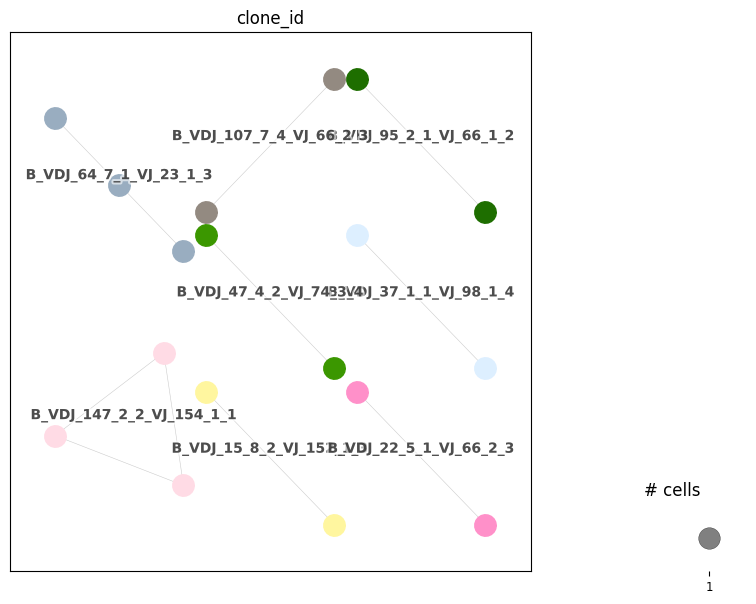

In [22]:
ir.tl.clonotype_network(irdata, min_cells=2)
ir.pl.clonotype_network(irdata, color="clone_id", panel_size=(7, 7))

to swap to a shorter clone_id name (ordered by size)

c:\Users\Amos Choo\Desktop\dandelion\env\Lib\site-packages\scirpy\pl\_clonotypes.py:194: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\Amos Choo\Desktop\dandelion\env\Lib\site-packages\scirpy\pl\_clonotypes.py:466: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\Amos Choo\Desktop\dandelion\env\Lib\site-packages\scirpy\pl\_clonotypes.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


<Axes: >

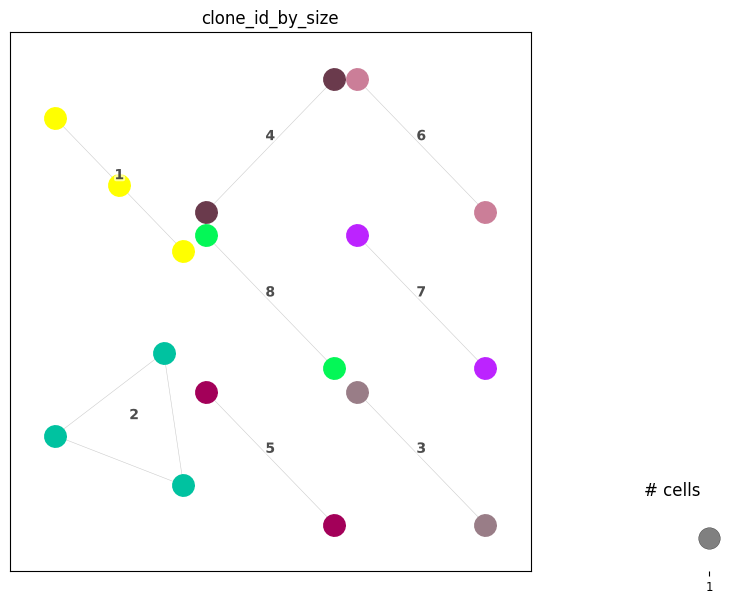

In [23]:
ddl.tl.transfer(irdata, vdj, clone_key="clone_id_by_size")
ir.tl.clonotype_network(irdata, clonotype_key="clone_id_by_size", min_cells=2)
ir.pl.clonotype_network(irdata, color="clone_id_by_size", panel_size=(7, 7))

you can also collapse the networks to a single node and plot by size

c:\Users\Amos Choo\Desktop\dandelion\env\Lib\site-packages\scirpy\pl\_clonotypes.py:194: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\Amos Choo\Desktop\dandelion\env\Lib\site-packages\scirpy\pl\_clonotypes.py:466: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
c:\Users\Amos Choo\Desktop\dandelion\env\Lib\site-packages\scirpy\pl\_clonotypes.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


<Axes: >

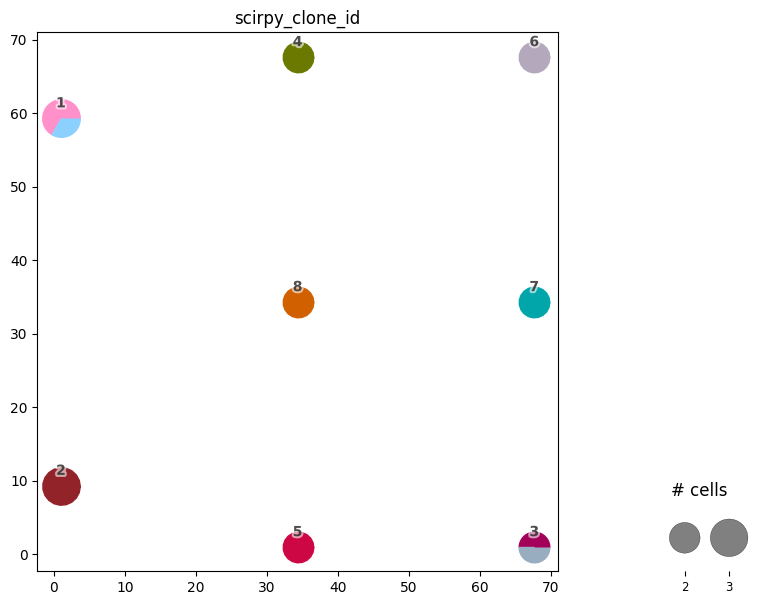

In [24]:
ddl.tl.transfer(irdata, vdj, clone_key="clone_id_by_size", collapse_nodes=True)
ir.tl.clonotype_network(irdata, clonotype_key="clone_id_by_size", min_cells=2)
ir.pl.clonotype_network(irdata, color="scirpy_clone_id", panel_size=(7, 7))